# BRAIN TUMOR DETECTION

In [1]:
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import keras
import cv2
import gradio as gr
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_set="C:\\Users\\acer\\Desktop\\sponsorship letter\\Datasets"

In [3]:
import pathlib

In [4]:
data_dir = pathlib.Path(data_set)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3000


In [5]:
no_tumor=list(data_dir.glob('no/*'))

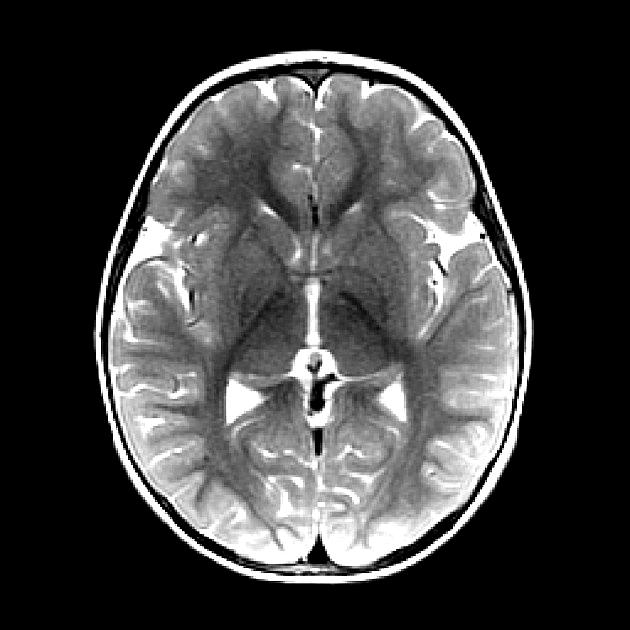

In [6]:
PIL.Image.open(str(no_tumor[0]))

In [7]:
yes_tumor=list(data_dir.glob('yes/*'))

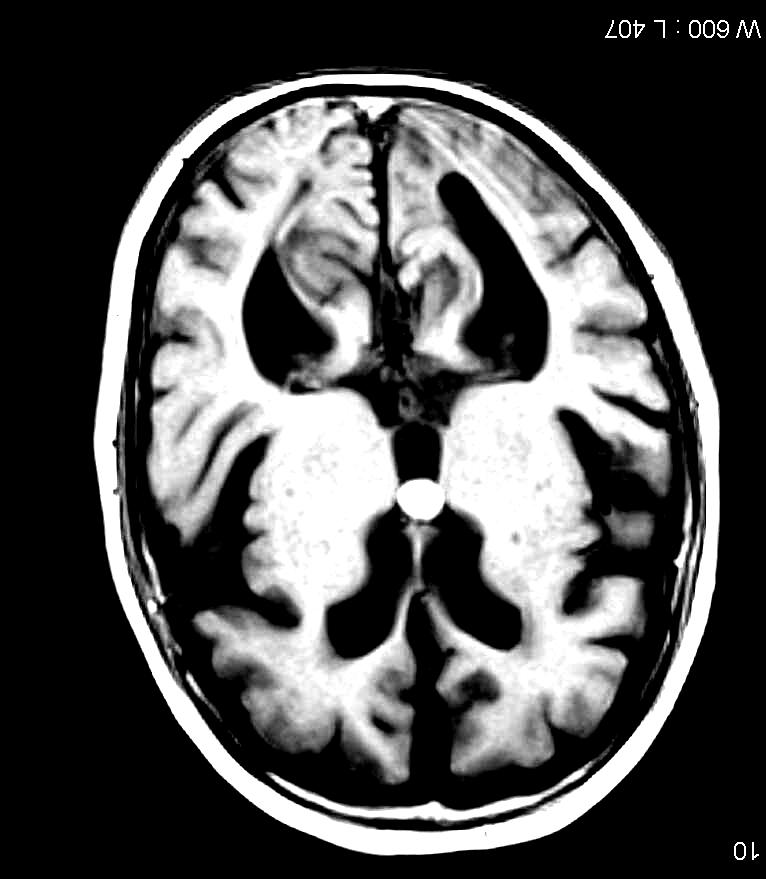

In [8]:
PIL.Image.open(str(yes_tumor[2]))

In [9]:
cv2.imread(str(yes_tumor[5])).shape

(303, 223, 3)

In [10]:
image_dict={
    "no":list(data_dir.glob('no/*')),
    "yes":list(data_dir.glob('yes/*'))
}

In [11]:
image_label={
    "no":0,
    "yes":1
}

In [12]:
X,y=[],[]
for tumor,images in image_dict.items():
    for image in images:
        image=cv2.imread(str(image))
        image_resize=cv2.resize(image,(180,180))
        X.append(image_resize)
        y.append(image_label[tumor])
        
    

In [13]:
X=np.array(X)
y=np.array(y)
X

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [14]:
#  X_scale=X/255

In [15]:
brain_class=["Tumor Not Detected","Tumor Detected"]

In [16]:
import sklearn

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=X.astype('float32')

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [20]:
data_agumentation=keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
#     tf.keras.layers.experimental.preprocessing.RandomFlip(,input_shape=(180,180,3))
])

## Training Of Model

In [23]:
model=keras.Sequential([
#     CNN
    data_agumentation,
    keras.layers.Conv2D(16,3,input_shape=(180,180,3),activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
#     layers
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,epochs=150)

Epoch 1/150
71/71 [==============================] - 5s 35ms/step - loss: 84.6293 - accuracy: 0.5915
Epoch 2/150
71/71 [==============================] - 2s 35ms/step - loss: 0.5735 - accuracy: 0.7214
Epoch 3/150
71/71 [==============================] - 3s 37ms/step - loss: 0.5362 - accuracy: 0.7424
Epoch 4/150
71/71 [==============================] - 3s 35ms/step - loss: 0.4895 - accuracy: 0.7643
Epoch 5/150
71/71 [==============================] - 2s 35ms/step - loss: 0.4677 - accuracy: 0.7816
Epoch 6/150
71/71 [==============================] - 3s 36ms/step - loss: 0.5004 - accuracy: 0.7518
Epoch 7/150
71/71 [==============================] - 3s 36ms/step - loss: 0.4515 - accuracy: 0.7775
Epoch 8/150
71/71 [==============================] - 3s 36ms/step - loss: 0.4751 - accuracy: 0.7772
Epoch 9/150
71/71 [==============================] - 3s 35ms/step - loss: 0.4541 - accuracy: 0.7877
Epoch 10/150
71/71 [==============================] - 2s 35ms/step - loss: 0.4565 - accuracy: 0.777

In [24]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 1s 14ms/step - loss: 0.1662 - accuracy: 0.9640


[0.16615791618824005, 0.9639999866485596]

In [25]:
pred=model.predict(X_test)
pred[3]

array([0.00104911, 0.99895084], dtype=float32)

In [26]:
pred=[np.argmax(i) for i in pred]

In [27]:
y_test[10:15]

array([1, 0, 0, 0, 1])

In [28]:
pred[10:15]

[1, 0, 0, 0, 1]

In [29]:
def predict(predict,index):
    if predict[index]==0:
        return "no_tumor"
    else:
        return "yes _tumor"

In [30]:
def true(true,index):
    if true[index]==0:
        return "no_tumor"
    else:
        return "yes _tumor"

In [31]:
for i in range(0,5):
    print(predict(pred,i))
   

no_tumor
no_tumor
yes _tumor
yes _tumor
yes _tumor


In [32]:
for i in range(0,5):
    print(true(y_test,i))

no_tumor
no_tumor
yes _tumor
yes _tumor
yes _tumor


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

## Classification Report For Yes And No

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       419
           1       0.94      0.98      0.96       331

    accuracy                           0.96       750
   macro avg       0.96      0.97      0.96       750
weighted avg       0.96      0.96      0.96       750



In [37]:
cm=confusion_matrix(y_test,pred)

In [38]:
import seaborn as sm
import matplotlib.pyplot as plt

## Confusion Matrix

Text(87.0, 0.5, 'Predicted')

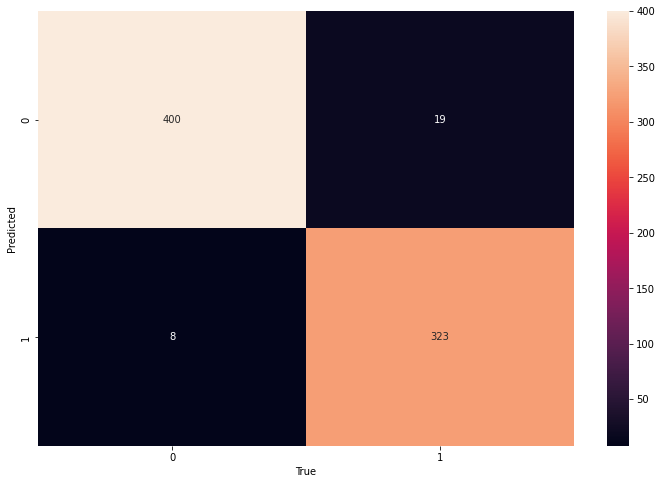

In [39]:
plt.figure(figsize=(12,8))
sm.heatmap(cm,annot=True,fmt="d")
plt.xlabel("True")
plt.ylabel("Predicted")

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)       

In [40]:
def predict_input_image(img):
    img_4d=img.reshape(-1,180,180,3)
    prediction=model.predict(img_4d)[0]
    return {brain_class[i]: float(prediction[i]) for i in range(2)}

In [41]:
image = gr.inputs.Image(shape=(180,180))

In [42]:
label = gr.outputs.Label(num_top_classes=2)

## Project Demonstration Using Gradio

In [ ]:
gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.
